In [ ]:
# ------------------------------
# CC GENERAL.csv 파일 기반 DBSCAN 군집 분석 코드
# ------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # 시각화를 위해 PCA 사용

# ----------------------------------------------------------------------
# 1. 데이터 준비 및 전처리 (K-Means 코드와 동일)
# ----------------------------------------------------------------------

# 데이터 로드
file_path = "CC GENERAL.csv"
df = pd.read_csv(file_path)

# CUST_ID 컬럼 제외
df_model = df.drop('CUST_ID', axis=1)

# 결측치 처리: 평균값으로 대체
df_model.fillna(df_model.mean(), inplace=True)

# 데이터 표준화(Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

print("1. 데이터 준비 및 표준화 완료. 데이터 크기:", X_scaled.shape)
print("-" * 60)


# ----------------------------------------------------------------------
#  2. DBSCAN 모델 학습 및 군집 할당
# ----------------------------------------------------------------------

# DBSCAN 매개변수 설정 (이 값들은 데이터셋에 따라 최적화가 필요함)
# 대규모 고차원 데이터에서는 최적의 매개변수를 찾기 어려울 수 있습니다.
EPSILON = 0.5  # 이웃 탐색 반경
MIN_SAMPLES = 10 # 최소 데이터 수 (MinPts)

# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)
cluster_labels = dbscan.fit_predict(X_scaled)

# 원본 데이터프레임에 군집 레이블 추가
df_model['Cluster'] = cluster_labels

print(f"2. DBSCAN 모델 학습 및 군집 할당 완료 (eps={EPSILON}, min_samples={MIN_SAMPLES})")
print(df_model[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'Cluster']].head())
print("-" * 60)


# ----------------------------------------------------------------------
#  3. 군집 결과 분석 (DBSCAN 특징 반영)
# ----------------------------------------------------------------------

# 군집별 데이터 개수 확인 (레이블 -1은 이상치/노이즈를 의미)
cluster_counts = df_model['Cluster'].value_counts().sort_index()
print("3-1. 군집별 데이터 개수 (Cluster -1은 Noise/Outlier):")
print(cluster_counts)
print(f"총 군집 개수 (노이즈 제외): {len(cluster_counts) - 1}개")

# 노이즈(-1)를 제외한 군집 프로파일 분석
meaningful_clusters = df_model[df_model['Cluster'] != -1]
cluster_profiles = meaningful_clusters.groupby('Cluster').mean()

print("\n3-2. 유의미한 군집별 특성(Feature) 평균 (Cluster Profile):")
print(cluster_profiles.T)
print("-" * 60)


# ----------------------------------------------------------------------
# 4. 군집 결과 시각화 (PCA 기반)
# ----------------------------------------------------------------------
# 고차원 데이터 시각화를 위해 PCA를 사용합니다.

# 1. PCA 모델 학습: 2개의 주성분으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. PCA 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

# 3. 산점도 시각화
plt.figure(figsize=(10, 8))

# 노이즈(-1)와 실제 군집을 구분하여 시각화하는 것이 일반적입니다.
scatter = plt.scatter(df_pca['PC1'],
                      df_pca['PC2'],
                      # 노이즈(-1)는 가장 어두운 색으로, 나머지 군집은 다른 색으로
                      c=df_pca['Cluster'],
                      cmap='Spectral', # 다양한 색상을 보여주는 Colormap
                      s=30,
                      alpha=0.7)

plt.title(f'DBSCAN Clustering Visualization via PCA (eps={EPSILON}, min_samples={MIN_SAMPLES})')
plt.xlabel(f'Principal Component 1')
plt.ylabel(f'Principal Component 2')

# 범례 추가 (레이블 -1이 노이즈를 의미함을 명시)
legend_elements = scatter.legend_elements()
labels = [f'Cluster {int(l)}' if int(l) != -1 else 'Noise (-1)' for l in legend_elements[0]]
plt.legend(handles=legend_elements[1], labels=labels, loc="upper right", title="Clusters")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("4. 군집 산점도 시각화 완료 (PCA 기반 2차원 투영)")


1. 데이터 준비 및 표준화 완료. 데이터 크기: (8950, 17)
------------------------------------------------------------
2. DBSCAN 모델 학습 및 군집 할당 완료 (eps=0.5, min_samples=10)
       BALANCE  PURCHASES  CASH_ADVANCE  Cluster
0    40.900749      95.40      0.000000       -1
1  3202.467416       0.00   6442.945483       -1
2  2495.148862     773.17      0.000000       -1
3  1666.670542    1499.00    205.788017       -1
4   817.714335      16.00      0.000000        0
------------------------------------------------------------
3-1. 군집별 데이터 개수 (Cluster -1은 Noise/Outlier):
Cluster
-1    7203
 0    1459
 1     197
 2      21
 3      11
 4      20
 5      10
 6      10
 7       9
 8      10
Name: count, dtype: int64
총 군집 개수 (노이즈 제외): 9개

3-2. 유의미한 군집별 특성(Feature) 평균 (Cluster Profile):
Cluster                                     0            1            2  \
BALANCE                            953.053024    26.498733     0.010636   
BALANCE_FREQUENCY                    0.997258     0.258422     0.004329   
PURCHASE

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'Line2D'

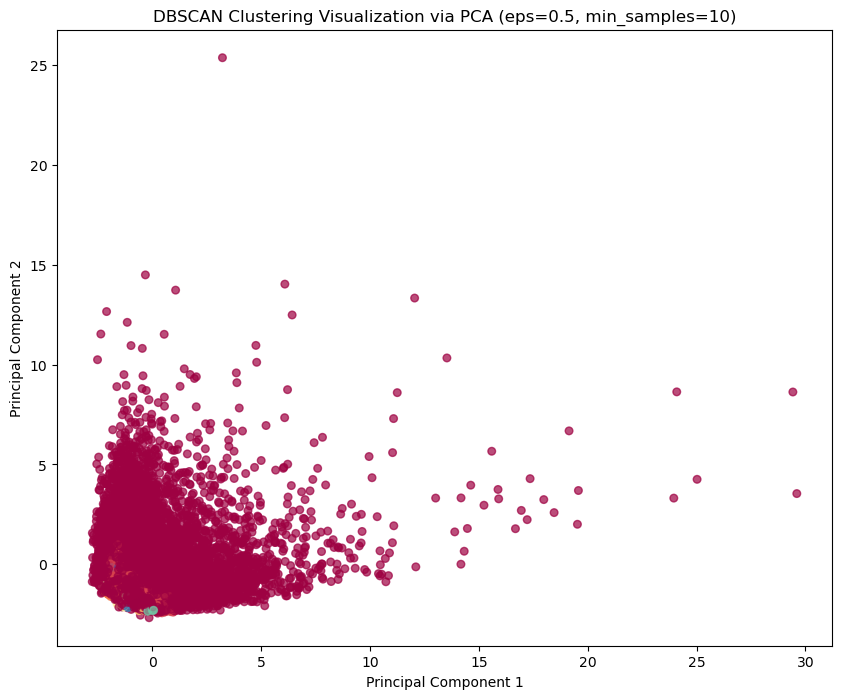

In [1]:
# ------------------------------
# CC GENERAL.csv 파일 기반 DBSCAN 군집 분석 코드
# ------------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # 시각화를 위해 PCA 사용

# ----------------------------------------------------------------------
# 1. 데이터 준비 및 전처리 (K-Means 코드와 동일)
# ----------------------------------------------------------------------

# 데이터 로드
file_path = "CC GENERAL.csv"
df = pd.read_csv(file_path)

# CUST_ID 컬럼 제외
df_model = df.drop('CUST_ID', axis=1)

# 결측치 처리: 평균값으로 대체
df_model.fillna(df_model.mean(), inplace=True)

# 데이터 표준화(Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

print("1. 데이터 준비 및 표준화 완료. 데이터 크기:", X_scaled.shape)
print("-" * 60)


# ----------------------------------------------------------------------
#  2. DBSCAN 모델 학습 및 군집 할당
# ----------------------------------------------------------------------

# DBSCAN 매개변수 설정 (이 값들은 데이터셋에 따라 최적화가 필요함)
# 대규모 고차원 데이터에서는 최적의 매개변수를 찾기 어려울 수 있습니다.
EPSILON = 0.5  # 이웃 탐색 반경
MIN_SAMPLES = 10 # 최소 데이터 수 (MinPts)

# DBSCAN 모델 생성 및 학습
dbscan = DBSCAN(eps=EPSILON, min_samples=MIN_SAMPLES)
cluster_labels = dbscan.fit_predict(X_scaled)

# 원본 데이터프레임에 군집 레이블 추가
df_model['Cluster'] = cluster_labels

print(f"2. DBSCAN 모델 학습 및 군집 할당 완료 (eps={EPSILON}, min_samples={MIN_SAMPLES})")
print(df_model[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'Cluster']].head())
print("-" * 60)


# ----------------------------------------------------------------------
#  3. 군집 결과 분석 (DBSCAN 특징 반영)
# ----------------------------------------------------------------------

# 군집별 데이터 개수 확인 (레이블 -1은 이상치/노이즈를 의미)
cluster_counts = df_model['Cluster'].value_counts().sort_index()
print("3-1. 군집별 데이터 개수 (Cluster -1은 Noise/Outlier):")
print(cluster_counts)
print(f"총 군집 개수 (노이즈 제외): {len(cluster_counts) - 1}개")

# 노이즈(-1)를 제외한 군집 프로파일 분석
meaningful_clusters = df_model[df_model['Cluster'] != -1]
cluster_profiles = meaningful_clusters.groupby('Cluster').mean()

print("\n3-2. 유의미한 군집별 특성(Feature) 평균 (Cluster Profile):")
print(cluster_profiles.T)
print("-" * 60)


# ----------------------------------------------------------------------
# 4. 군집 결과 시각화 (PCA 기반)
# ----------------------------------------------------------------------
# 고차원 데이터 시각화를 위해 PCA를 사용합니다.

# 1. PCA 모델 학습: 2개의 주성분으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. PCA 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

# 3. 산점도 시각화
plt.figure(figsize=(10, 8))

# 노이즈(-1)와 실제 군집을 구분하여 시각화하는 것이 일반적입니다.
scatter = plt.scatter(df_pca['PC1'],
                      df_pca['PC2'],
                      # 노이즈(-1)는 가장 어두운 색으로, 나머지 군집은 다른 색으로
                      c=df_pca['Cluster'],
                      cmap='Spectral', # 다양한 색상을 보여주는 Colormap
                      s=30,
                      alpha=0.7)

plt.title(f'DBSCAN Clustering Visualization via PCA (eps={EPSILON}, min_samples={MIN_SAMPLES})')
plt.xlabel(f'Principal Component 1')
plt.ylabel(f'Principal Component 2')

# 범례 추가 (레이블 -1이 노이즈를 의미함을 명시)
legend_elements = scatter.legend_elements()
labels = [f'Cluster {int(l)}' if int(l) != -1 else 'Noise (-1)' for l in legend_elements[0]]
plt.legend(handles=legend_elements[1], labels=labels, loc="upper right", title="Clusters")

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("4. 군집 산점도 시각화 완료 (PCA 기반 2차원 투영)")
